In [2]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns   
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("HeartDisease.csv")
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Here’s a brief explanation of each column:

age: Patient’s age (years).

gender: Patient’s sex (0 = female, 1 = male).

chest_pain: Type of chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).

rest_bps: Resting blood pressure (mmHg) measured when the patient is at rest.High resting blood pressure is a significant risk factor for heart disease.

cholestrol: Serum cholesterol level (mg/dL).

fasting_blood_sugar: Fasting blood sugar (1 = > 120 mg/dL, 0 = ≤ 120 mg/dL).

rest_ecg: Resting ECG results (0 = normal, 1 = abnormal, 2 = hypertrophy).

thalach: Maximum heart rate during exercise.

exer_angina: Exercise-induced chest pain (1 = yes, 0 = no).

old_peak: ST segment depression during exercise (mm).

slope: Slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).

ca: Number of major coronary arteries affected (0-3).

thalassemia: Presence of thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect).

target: Heart disease presence (1 = yes, 0 = no).

In [4]:
data.shape

(303, 14)

In [85]:
data.columns, len(data.columns)

(Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
        'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
        'slope', 'ca', 'thalassemia', 'target'],
       dtype='object'),
 14)

In [6]:
data.size

4242

In [7]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [8]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.duplicated().sum()   # To calculate the number of duplicate rows in the DataFrame and store it in the variable 'data1'


1

# Visualization

([<matplotlib.axis.XTick at 0x1edc7367ed0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

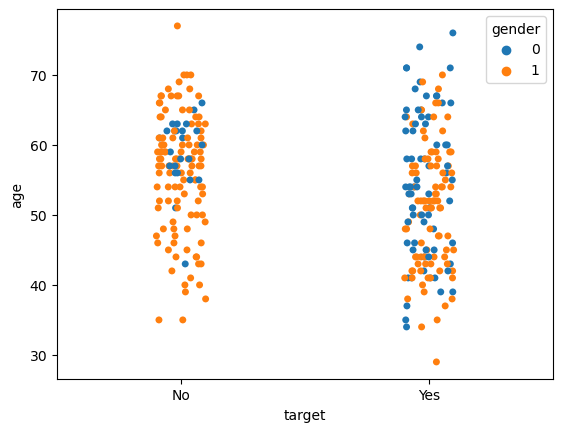

In [81]:
sns.stripplot(x=data.target,y=data.age,data=data,hue=data.gender)
plt.xticks([0, 1],['No', 'Yes'])  # Rename the x-ticks

(array([138.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 165.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

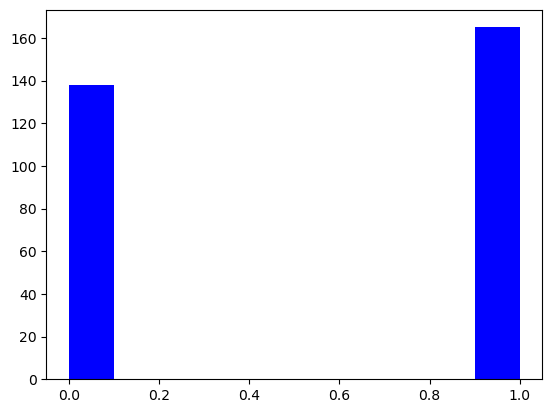

In [13]:
plt.hist(data['target'],color='blue')

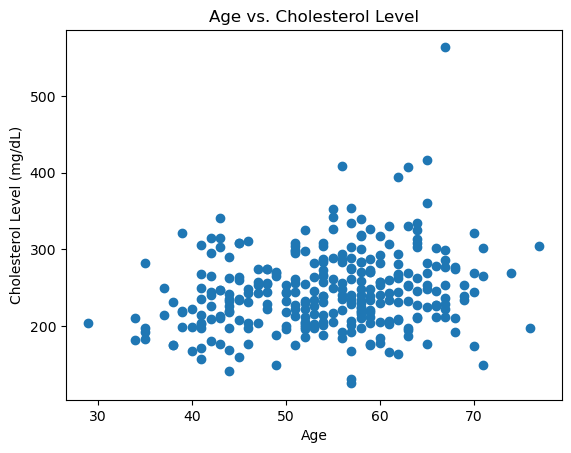

In [97]:
plt.scatter(data['age'], data['cholestrol'])
plt.title('Age vs. Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.show()

# Checking for correlation

In [18]:
data.columns
data2 = data.copy()

In [19]:
relation = data2[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target']].corr()
relation

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Split the data into training and test sets

In [22]:
x = data2[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia']]
y = data2[['target']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=70)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212, 1), (91, 1))

In [24]:
data10 = data['target'].value_counts()
data10

target
1    165
0    138
Name: count, dtype: int64

# Decision Tree using Gini index

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
dtree = DecisionTreeClassifier(criterion = 'gini',min_samples_split=0.1)

In [27]:
dtree.fit(X_train,y_train)    

DecisionTreeClassifier(min_samples_split=0.1)

In [28]:
y_pred = dtree.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8021978021978022

# Decision Tree using entropy

In [30]:
dtree_ent = DecisionTreeClassifier(criterion = 'entropy',)

In [31]:
dtree_ent.fit(X_train,y_train)    

DecisionTreeClassifier(criterion='entropy')

In [32]:
y_pred = dtree_ent.predict(X_test)

In [33]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.7692307692307693

In [34]:
output = data2['target']
input_feature = data2.drop(columns=['target'])

In [55]:
label = dtree.classes_
features = input_feature.columns
features,label

(Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
        'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
        'slope', 'ca', 'thalassemia'],
       dtype='object'),
 array([0, 1], dtype=int64))

In [57]:
class_names = [str(cls) for cls in label]

[Text(0.5, 0.9285714285714286, 'chest_pain <= 0.5\ngini = 0.491\nsamples = 212\nvalue = [92, 120]\nclass = 1'),
 Text(0.2631578947368421, 0.7857142857142857, 'ca <= 0.5\ngini = 0.399\nsamples = 98\nvalue = [71, 27]\nclass = 0'),
 Text(0.15789473684210525, 0.6428571428571429, 'thalassemia <= 2.5\ngini = 0.498\nsamples = 45\nvalue = [21, 24]\nclass = 1'),
 Text(0.10526315789473684, 0.5, 'exer_angina <= 0.5\ngini = 0.384\nsamples = 27\nvalue = [7, 20]\nclass = 1'),
 Text(0.05263157894736842, 0.35714285714285715, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = 1'),
 Text(0.15789473684210525, 0.35714285714285715, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = 1'),
 Text(0.21052631578947367, 0.5, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]\nclass = 0'),
 Text(0.3684210526315789, 0.6428571428571429, 'cholestrol <= 301.5\ngini = 0.107\nsamples = 53\nvalue = [50, 3]\nclass = 0'),
 Text(0.3157894736842105, 0.5, 'thalach <= 105.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]\nclass = 

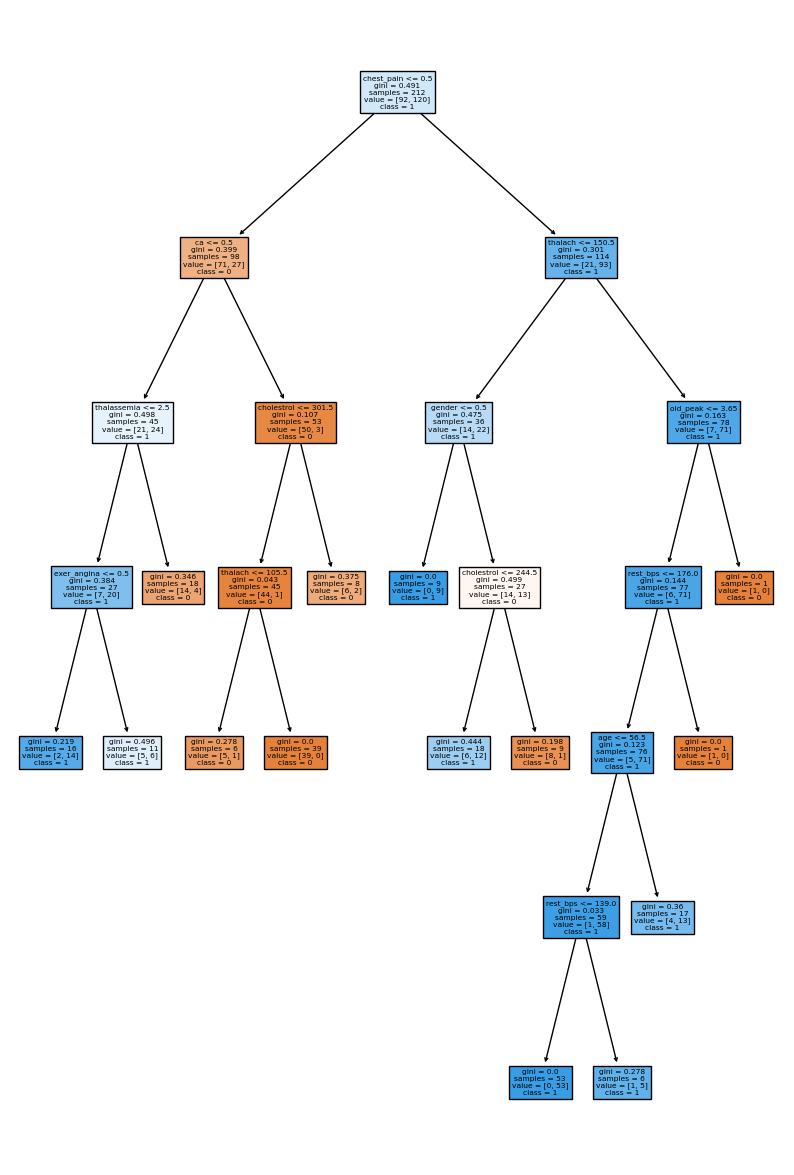

In [59]:
from sklearn.tree import plot_tree     #desicion tree for gini criterion
plt.figure(figsize=(10,15))
plot_tree(dtree, feature_names=list(features), class_names=class_names, filled=True)


# Tuning the Model

In [40]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid={'max_depth':[5]}, cv=5, verbose=2)
#grid search is to try out different values and then pick the value that gives the best score.

In [41]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_samples_split=0.1),
             param_grid={'max_depth': [5]}, verbose=2)

In [42]:
best_dtree = grid_search.best_estimator_
accuracy = best_dtree.score(X_test, y_test)
accuracy

0.8021978021978022

In [43]:
best_dtree

DecisionTreeClassifier(max_depth=5, min_samples_split=0.1)

[Text(0.5, 0.9166666666666666, 'chest_pain <= 0.5\ngini = 0.491\nsamples = 212\nvalue = [92, 120]\nclass = 1'),
 Text(0.2631578947368421, 0.75, 'ca <= 0.5\ngini = 0.399\nsamples = 98\nvalue = [71, 27]\nclass = 0'),
 Text(0.15789473684210525, 0.5833333333333334, 'thalassemia <= 2.5\ngini = 0.498\nsamples = 45\nvalue = [21, 24]\nclass = 1'),
 Text(0.10526315789473684, 0.4166666666666667, 'thalach <= 146.0\ngini = 0.384\nsamples = 27\nvalue = [7, 20]\nclass = 1'),
 Text(0.05263157894736842, 0.25, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = 1'),
 Text(0.15789473684210525, 0.25, 'gini = 0.219\nsamples = 16\nvalue = [2, 14]\nclass = 1'),
 Text(0.21052631578947367, 0.4166666666666667, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]\nclass = 0'),
 Text(0.3684210526315789, 0.5833333333333334, 'cholestrol <= 301.5\ngini = 0.107\nsamples = 53\nvalue = [50, 3]\nclass = 0'),
 Text(0.3157894736842105, 0.4166666666666667, 'thalach <= 105.5\ngini = 0.043\nsamples = 45\nvalue = [44, 1]\nclass = 0

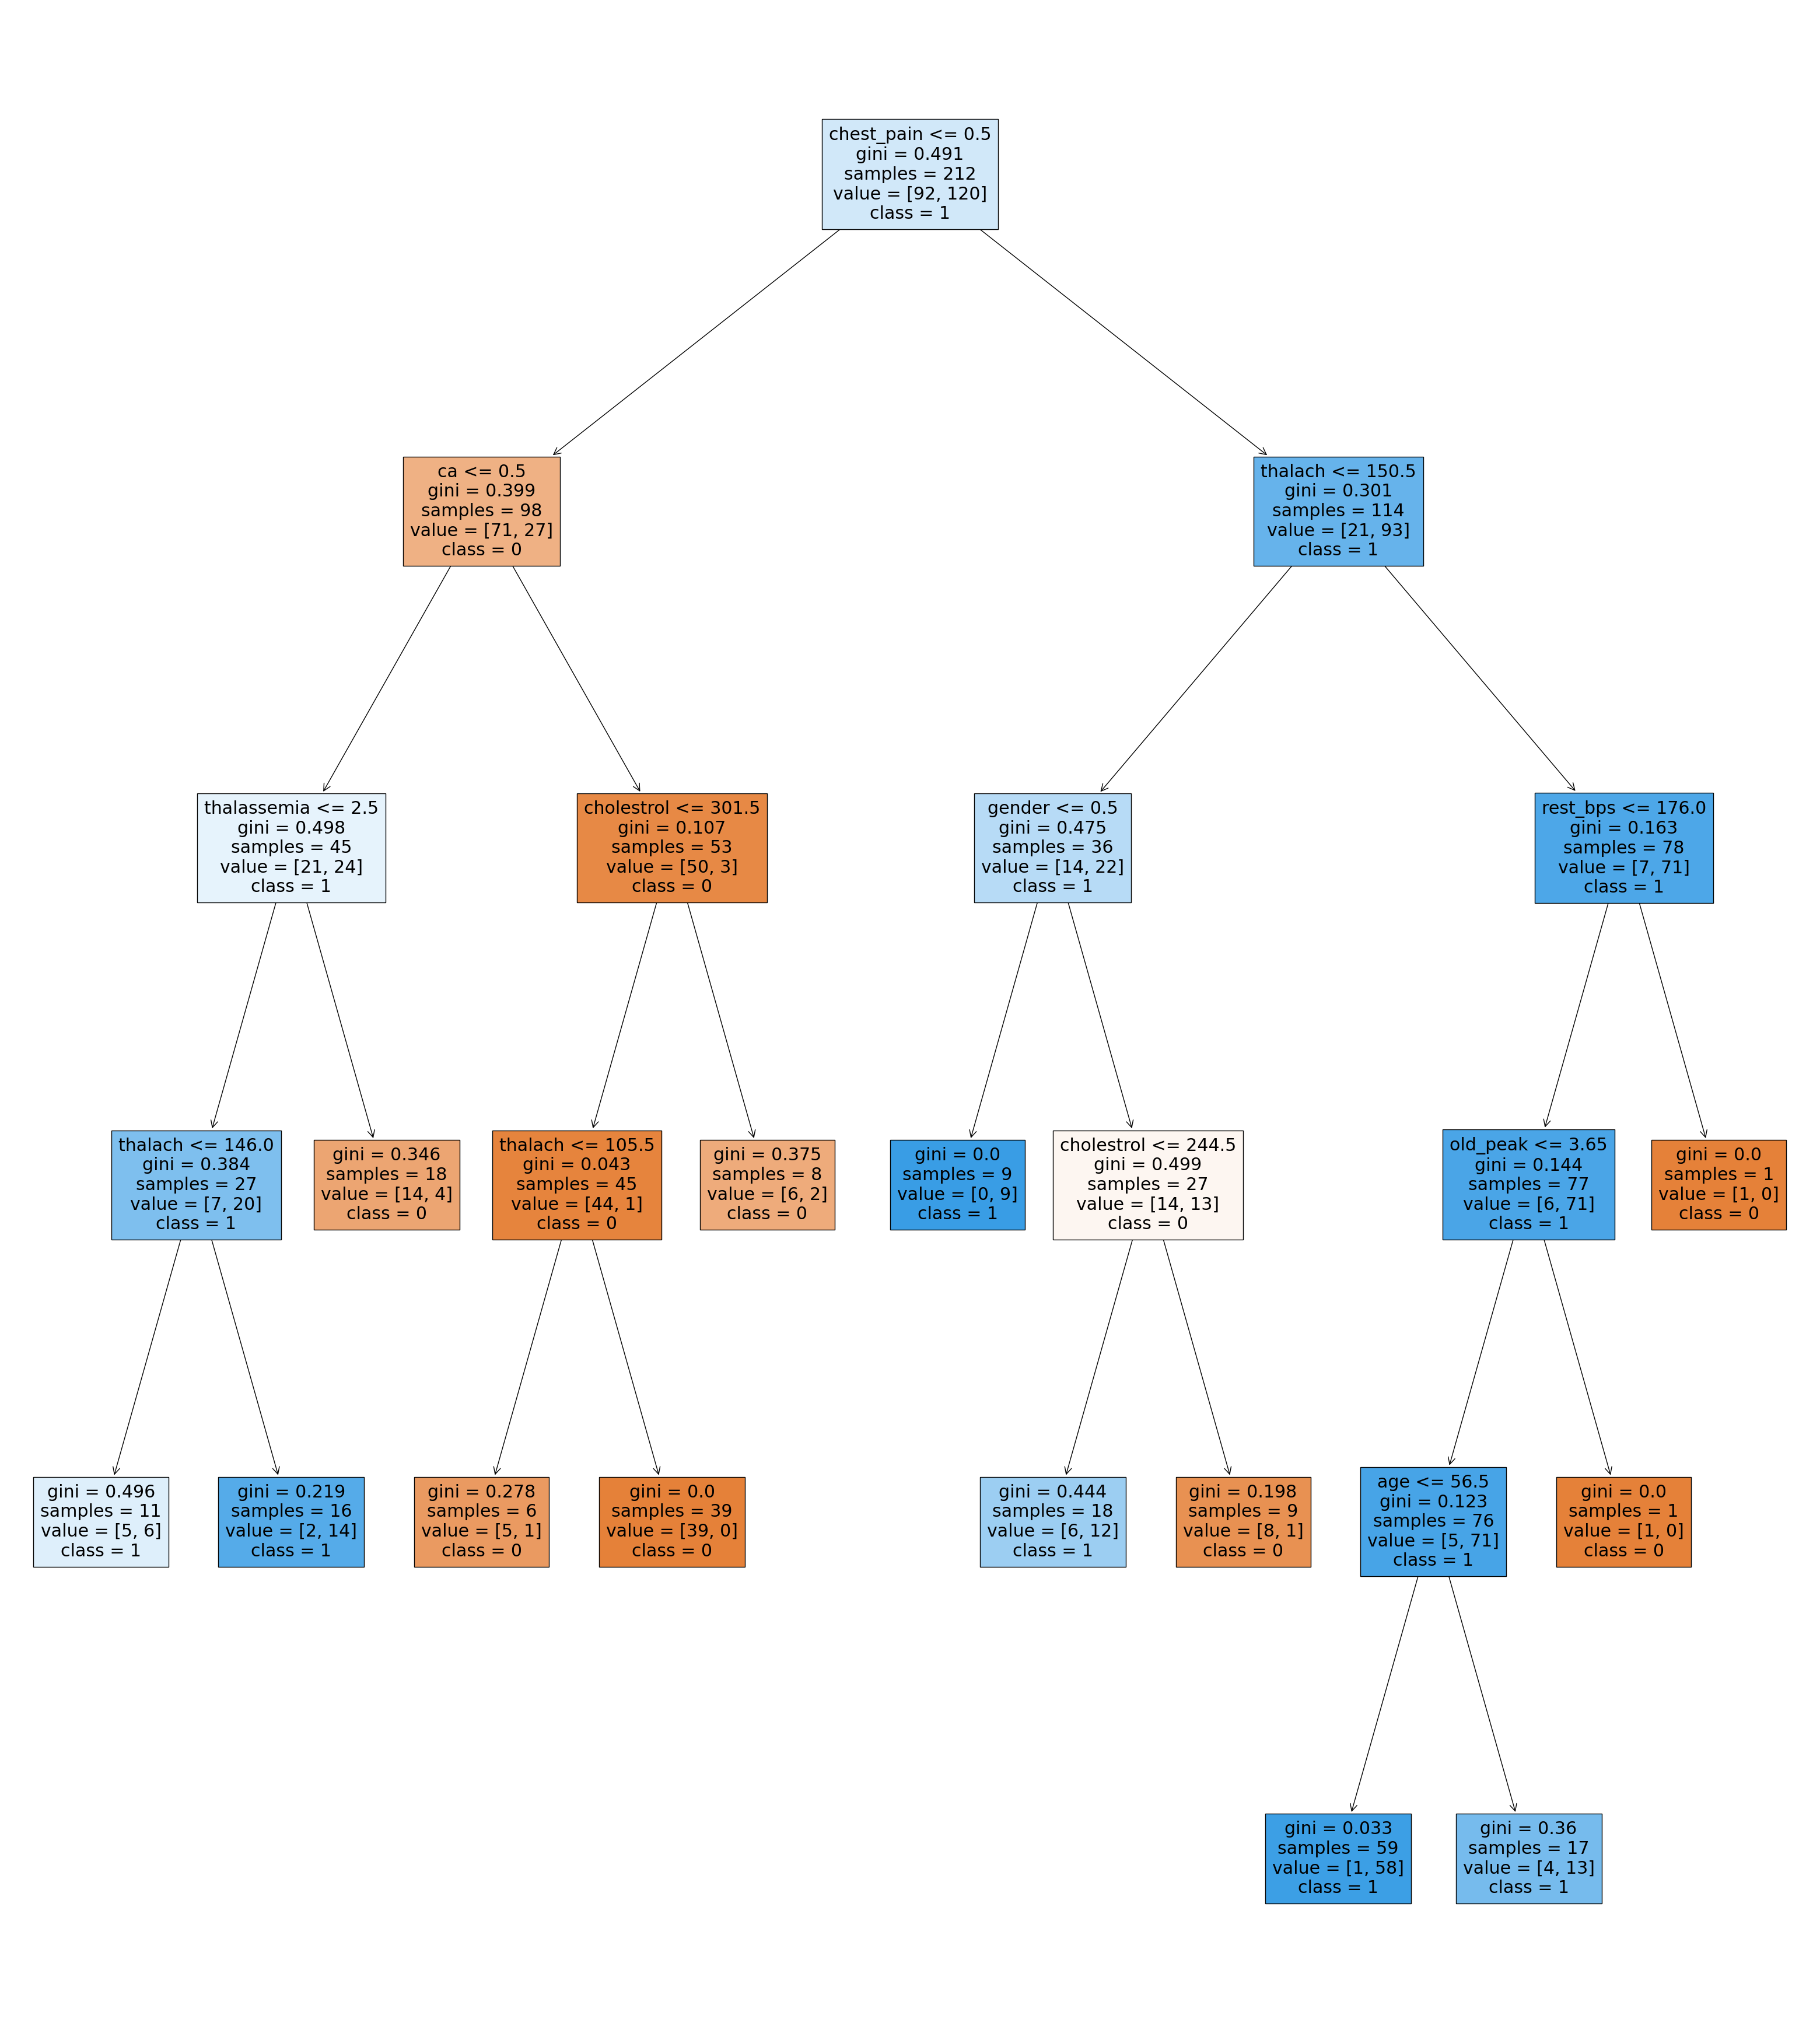

In [60]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,45))
plot_tree(best_dtree, feature_names=list(features), class_names=class_names, filled=True)


# Prediction

In [87]:
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [95]:
a = np.array(float(input("Enter your age:")))
b = np.array(float(input("Enter your gender (0 = female, 1 = male):")))
c = np.array(float(input("Enter the chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic):")))
d = np.array(float(input("Enter the rest bps:")))
e = np.array(float(input("Enter the cholestrol level:")))
f = np.array(float(input("Enter the fasting blood sugar (1 = > 120 mg/dL, 0 = ≤ 120 mg/dL):")))
g = np.array(float(input("Enter the rest ecg (0 = normal, 1 = abnormal, 2 = hypertrophy):")))
h = np.array(float(input("Enter the thalach:")))
i = np.array(float(input("Enter the escer angina (1 = yes, 0 = no):")))
j = np.array(float(input("Enter the old peak:")))
k = np.array(float(input("Enter the slope (1 = upsloping, 2 = flat, 3 = downsloping):")))
l = np.array(float(input("Enter the ca (0-3):")))
m = np.array(float(input("Enter the thalassemian (1 = normal, 2 = fixed defect, 3 = reversible defect):")))


Enter your age:41
Enter your gender (0 = female, 1 = male):0
Enter the chest pain (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic):1
Enter the rest bps:130
Enter the cholestrol level:204
Enter the fasting blood sugar (1 = > 120 mg/dL, 0 = ≤ 120 mg/dL):0
Enter the rest ecg (0 = normal, 1 = abnormal, 2 = hypertrophy):0
Enter the thalach:172
Enter the escer angina (1 = yes, 0 = no):0
Enter the old peak:1.4
Enter the slope (1 = upsloping, 2 = flat, 3 = downsloping):2
Enter the ca (0-3):0
Enter the thalassemian (1 = normal, 2 = fixed defect, 3 = reversible defect):2


In [96]:
features_new = np.array([[a, b, c, d, e, f, g, h, i, j, k, l, m]])
new_predict = dtree.predict(features_new)
if new_predict == 0:
    print('Report: Negative, You are not having heart disease')
else:
    print('Report: Positive, You are having heart diasease')

Report: Positive, You are having heart diasease
